<a href="https://colab.research.google.com/github/tnotstar/machine-learning-zoomcamp/blob/master/cohorts/2025/02-regression/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Zoomcamp (Cohort 2025) #

## Chapter 02. Regression analysis ##

### Homework ###

#### Submission at 2025-10-08

First we download data from given URL. We use options flag `-N` to avoid redownloads and `car_fuel_efficiency.csv.1` files.

In [1]:
!wget -N 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

--2025-10-08 21:40:07--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

Last-modified header missing -- time-stamps turned off.
2025-10-08 21:40:07 (21.3 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



Now, we import all required libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Then we load data into a Pandas' data frame:

In [3]:
dx = pd.read_csv("car_fuel_efficiency.csv")

In [4]:
dx.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

Drop unused columns:

In [5]:
dw = dx.loc[:,['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

Look at the `fuel_efficiency_mpg` variable:

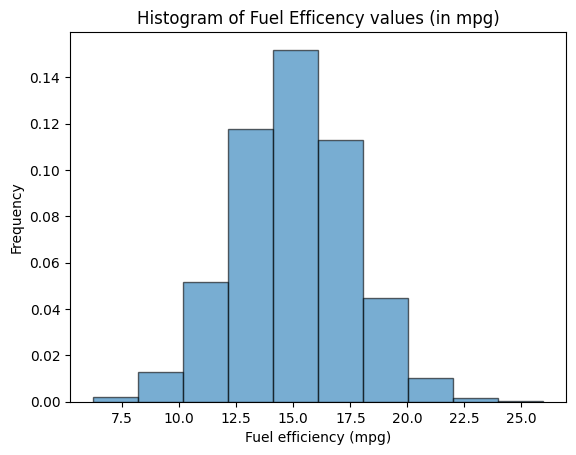

In [6]:
plt.hist(dw['fuel_efficiency_mpg'], density=True, alpha=0.6, edgecolor='black')
plt.title('Histogram of Fuel Efficency values (in mpg)')
plt.xlabel('Fuel efficiency (mpg)')
plt.ylabel('Frequency')
plt.show()

This frequency histogram resembles the probability density function of a normal distribution. Let's estimate its parameters to graph them together:

In [7]:
mu = dw['fuel_efficiency_mpg'].mean()
sigma = dw['fuel_efficiency_mpg'].std()
print(f"Estimated sample parameters: mu = {mu} y sigma = {sigma}")

Estimated sample parameters: mu = 14.985243228208573 y sigma = 2.5564677028974288


##### Question 1

There's one column with missing values. What is it?

In [8]:
desc = dw.describe(include='all')
print(f"Descriptive estadístics: {desc}")

Descriptive estadístics:        engine_displacement   horsepower  vehicle_weight   model_year  \
count          9704.000000  8996.000000     9704.000000  9704.000000   
mean            199.708368   149.657292     3001.280993  2011.484027   
std              49.455319    29.879555      497.894860     6.659808   
min              10.000000    37.000000      952.681761  2000.000000   
25%             170.000000   130.000000     2666.248985  2006.000000   
50%             200.000000   149.000000     2993.226296  2012.000000   
75%             230.000000   170.000000     3334.957039  2017.000000   
max             380.000000   271.000000     4739.077089  2023.000000   

       fuel_efficiency_mpg  
count          9704.000000  
mean             14.985243  
std               2.556468  
min               6.200971  
25%              13.267459  
50%              15.006037  
75%              16.707965  
max              25.967222  


Some scatterplots for variables versus target:

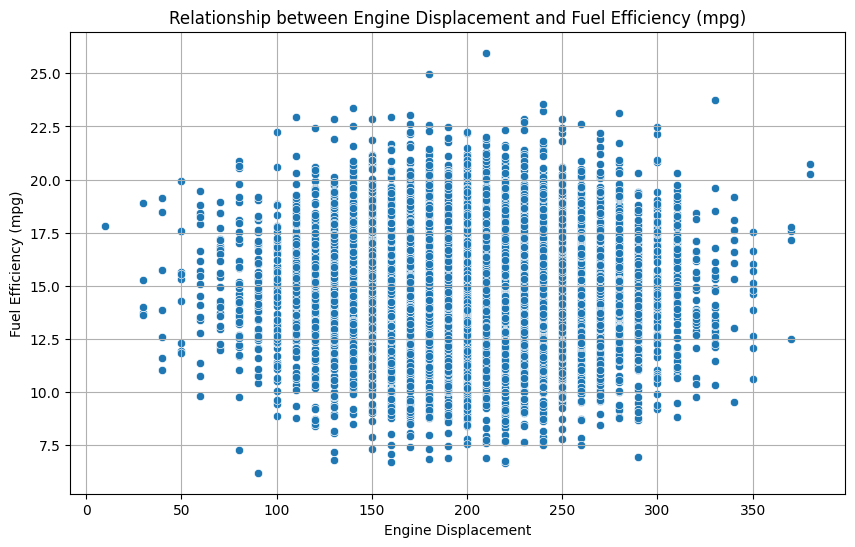

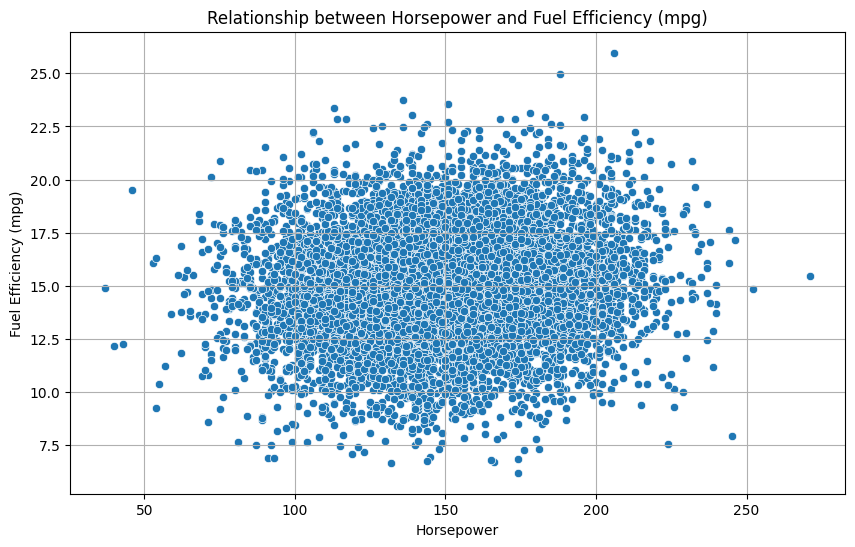

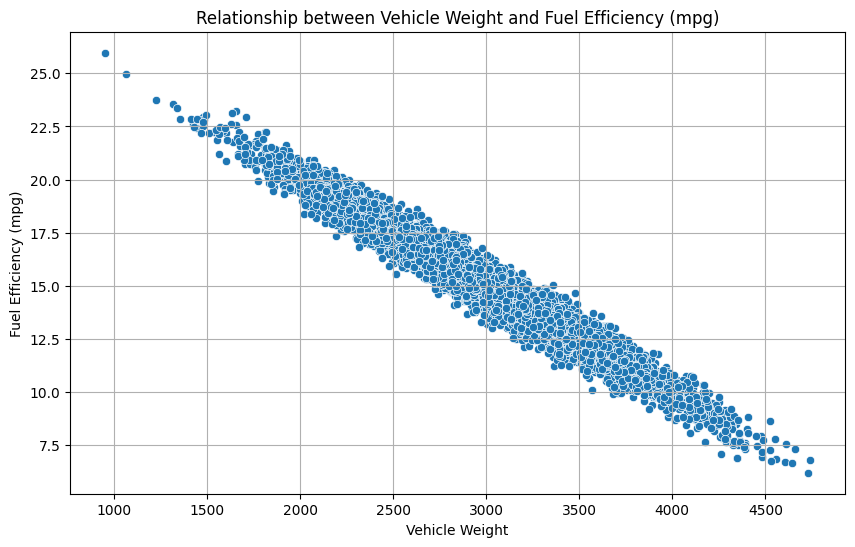

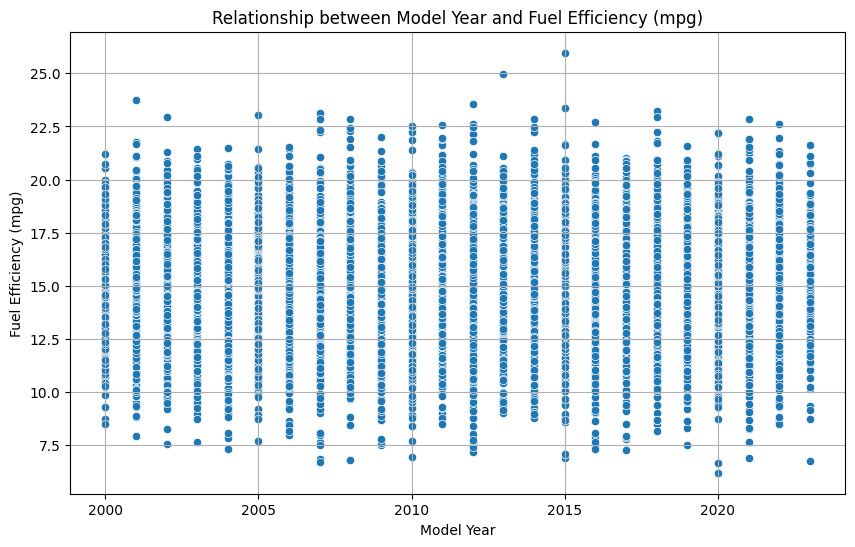

In [9]:
features = [col for col in dw.columns if col != 'fuel_efficiency_mpg']
target = 'fuel_efficiency_mpg'

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dw, x=feature, y=target)
    plt.title(f'Relationship between {feature.replace("_", " ").title()} and Fuel Efficiency (mpg)')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Fuel Efficiency (mpg)')
    plt.grid(True)
    plt.show()

Now we will calculate missing values:

In [10]:
missing = dw.isnull().sum()
print(f"Missing values: {missing}")

Missing values: engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


###### Result(s)

In [11]:
print(f"The horsepower variable contains {missing['horsepower']} missing values.")

The horsepower variable contains 708 missing values.


##### Question 2

What's the median (50% percentile) for variable 'horsepower'?

In [12]:
horsepower_median = dw['horsepower'].median()
print(f"The `horsepower` median is {horsepower_median}")

The `horsepower` median is 149.0


#### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%, 20% & 20% distribution.
* Use the same code as in the lectures

#### Validation framework

In [13]:
def validation_framework(df, valid_percent, test_percent, seed):
  n = len(df)
  n_val = int(valid_percent * n)
  n_test = int(test_percent * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)
  print(f"Following are first 10 generated index: {idx[:10]}")

  dw_shuffled = dw.iloc[idx]
  print(f"Whole data set has random {len(dw_shuffled)} rows")

  dw_train = dw_shuffled.iloc[:n_train].copy()
  print(f"Training data set has random {len(dw_train)} rows")

  dw_val = dw_shuffled.iloc[n_train:n_train + n_val].copy()
  print(f"Validation data set has random {len(dw_val)} rows")

  dw_test = dw_shuffled.iloc[n_train + n_val: ].copy()
  print(f"Testing data set has random {len(dw_test)} rows")

  return dw_train, dw_val, dw_test

In [14]:
dw_train, dw_val, dw_test = validation_framework(dw, 0.2, 0.2, 42)
print(dw_train.head())

Following are first 10 generated index: [ 483 7506 8795 1688 6217 4562 5885 3746 7109 2698]
Whole data set has random 9704 rows
Training data set has random 5824 rows
Validation data set has random 1940 rows
Testing data set has random 1940 rows
      engine_displacement  horsepower  vehicle_weight  model_year  \
483                   220       144.0     2535.887591        2009   
7506                  160       141.0     2741.170484        2019   
8795                  230       155.0     2471.880237        2017   
1688                  150       206.0     3748.164469        2015   
6217                  300       111.0     2135.716359        2006   

      fuel_efficiency_mpg  
483             16.642943  
7506            16.298377  
8795            18.591822  
1688            11.818843  
6217            19.402209  


##### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [15]:
def prepare_data_subset(df, fill_value):
  target = 'fuel_efficiency_mpg'
  features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

  df = df.copy()
  df[features] = df[features].fillna(fill_value)
  X = df.drop(columns=[target]).values
  y = df[target].values

  return X, y

Now, we apply `prepare_data_subsets` function:

In [16]:
train_horsepower_mean_before_fillna = dw_train['horsepower'].mean()

Xu_train, yu_train = prepare_data_subset(dw_train, train_horsepower_mean_before_fillna)
Xv_train, yv_train = prepare_data_subset(dw_train, 0)

Then we create our training function:

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

And then, we use it to train with training data and mean filled:

In [18]:
w0_mean_fill, w_mean_fill = train_linear_regression(Xu_train, yu_train)

print(f"Interception (w0) with mean fill: {w0_mean_fill}")
print(f"Weights (w) with mean fill: {w_mean_fill}")

Interception (w0) with mean fill: 28.925259951002698
Weights (w) with mean fill: [ 0.00012093  0.01030308 -0.00501009 -0.00023463]


... and with zero filled:

In [19]:
w0_zero_fill, w_zero_fill = train_linear_regression(Xv_train, yv_train)

print(f"Interception (w0) with mean fill: {w0_zero_fill}")
print(f"Weights (w) with mean fill: {w_zero_fill}")

Interception (w0) with mean fill: 28.82736547365895
Weights (w) with mean fill: [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992870e-04]


Now predict and compare predictions histograms:

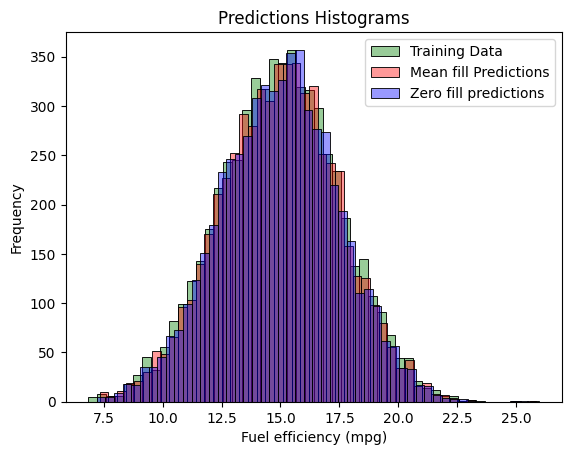

In [20]:
yw_train = dw_train['fuel_efficiency_mpg'].values
yu_pred = w0_mean_fill + Xu_train.dot(w_mean_fill)
yv_pred = w0_zero_fill + Xv_train.dot(w_zero_fill)

sns.histplot(yw_train, color="green", alpha=0.4, bins=50, label="Training Data")
sns.histplot(yu_pred, color="red", alpha=0.4, bins=50, label="Mean fill Predictions")
sns.histplot(yv_pred, color="blue", alpha=0.4, bins=50, label="Zero fill predictions")

plt.title("Predictions Histograms")
plt.xlabel("Fuel efficiency (mpg)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Then both predictions look similar to given data, so we need to calculate a fitting metric:

In [21]:
def rmse(y_pred, y_actual):
  return np.sqrt(np.mean((y_pred - y_actual)**2))

So both models look similar but mean filled is a bit better by RMSE criteria:  

In [22]:
X_mean_train, y_mean_train = prepare_data_subset(dw_train, train_horsepower_mean_before_fillna)
w0_mean_train, w_mean_train = train_linear_regression(X_mean_train, y_mean_train)

y_mean_pread = w0_mean_train + X_mean_train.dot(w_mean_train)
print(f"RMSE with mean fill: {rmse(y_mean_pread, y_mean_train):.2f}")

X_zero_train, y_zero_train = prepare_data_subset(dw_train, 0)
w0_zero_train, w_zero_train = train_linear_regression(X_zero_train, y_zero_train)

y_zero_pread = w0_zero_train + X_zero_train.dot(w_zero_train)
print(f"RMSE with zero fill: {rmse(y_zero_pread, y_zero_train):.2f}")


RMSE with mean fill: 0.46
RMSE with zero fill: 0.52


##### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

In [23]:
def train_linear_regression_reg(X, y, r = 0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

Now for given values of regularization `r`:

In [24]:
X_zero_train, y_zero_train = prepare_data_subset(dw_train, 0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
  w0_zero_train, w_zero_train = train_linear_regression_reg(X_zero_train, y_zero_train, r)
  y_zero_pread = w0_zero_train + X_zero_train.dot(w_zero_train)

  print(f"RMSE with r = {r}: {rmse(y_zero_pread, y_zero_train):.4f}")


RMSE with r = 0: 0.5203
RMSE with r = 0.01: 0.5204
RMSE with r = 0.1: 0.5235
RMSE with r = 1: 0.5279
RMSE with r = 5: 0.5287
RMSE with r = 10: 0.5288
RMSE with r = 100: 0.5289


Then `r = 0` is the best RMSE.

##### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))


In [25]:
rs = []
for s in range(10):
  dw_train, dw_val, dw_test = validation_framework(dw, 0.2, 0.2, s)

  X_train, y_train = prepare_data_subset(dw_train, 0.0)
  X_val, y_val = prepare_data_subset(dw_val, 0.0)

  w0_train, w_train = train_linear_regression_reg(X_train, y_train, 0.0)
  y_pred = w0_train + X_val.dot(w_train)

  r = rmse(y_pred, y_val)
  rs.append(r)
  print(f"RMSE with s = {s}: {r:.4f}\n")

rsa = np.array(rs)
print(f"Mean RMSE: {np.mean(rsa):.4f}, standard deviation: {round(np.std(rsa), 3)}")

Following are first 10 generated index: [6146 3410  272 7044 6730  190 7610 2021 7772 7675]
Whole data set has random 9704 rows
Training data set has random 5824 rows
Validation data set has random 1940 rows
Testing data set has random 1940 rows
RMSE with s = 0: 0.5207

Following are first 10 generated index: [2754 3802 1432 9088 9280 7135 3668 2103 1910  988]
Whole data set has random 9704 rows
Training data set has random 5824 rows
Validation data set has random 1940 rows
Testing data set has random 1940 rows
RMSE with s = 1: 0.5213

Following are first 10 generated index: [ 246 8125 1927 8235  424 5856 8894 8229  454 2899]
Whole data set has random 9704 rows
Training data set has random 5824 rows
Validation data set has random 1940 rows
Testing data set has random 1940 rows
RMSE with s = 2: 0.5228

Following are first 10 generated index: [ 433 3584 5104 2431 1048 6541  322 4047 2521 8329]
Whole data set has random 9704 rows
Training data set has random 5824 rows
Validation data set 

##### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [26]:
dw_combined = pd.concat([dw_train, dw_val])
X_comb, y_comb = prepare_data_subset(dw_combined, 0.0)
X_test, y_test = prepare_data_subset(dw_test, 0.0)
w0_comb, w_comb = train_linear_regression_reg(X_comb, y_comb, 0.001)
y_pred = w0_comb + X_test.dot(w_comb)
print(f"RMSE on the test dataset: {rmse(y_pred, y_test):.4f}")

RMSE on the test dataset: 0.5156
